<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.0 MB/s eta 0:00:00


##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
## Write your code here

# Display basic information of the dataset
print("Basic Information:")
print(df.info())

# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65457 entries, 0 to 65456
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Summary Statistics:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65457.000000   3.374400e+04  29664.000000    29330.000000   
mean   32714.493591  2.963490e+145     11.466323       18.578998   
std    18892.431636  5.443794e+147      9.168205       25.965347   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16354.000000   6.000000e+04      4.000000        0.000000   
50%    32716.000000   1.100000e+05      9.000000       10.000000   
75%    49076.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29399.000000    29417.000000    29456.000000    29454.000000   
mean       

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [5]:
## Write your code here

# Identify missing values for all columns
missing_values = df.isnull().sum()

# Display the number of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10637
                       ...  
JobSatPoints_11        36006
SurveyLength            9259
SurveyEase              9202
ConvertedCompYearly    42020
JobSat                 36326
Length: 114, dtype: int64


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



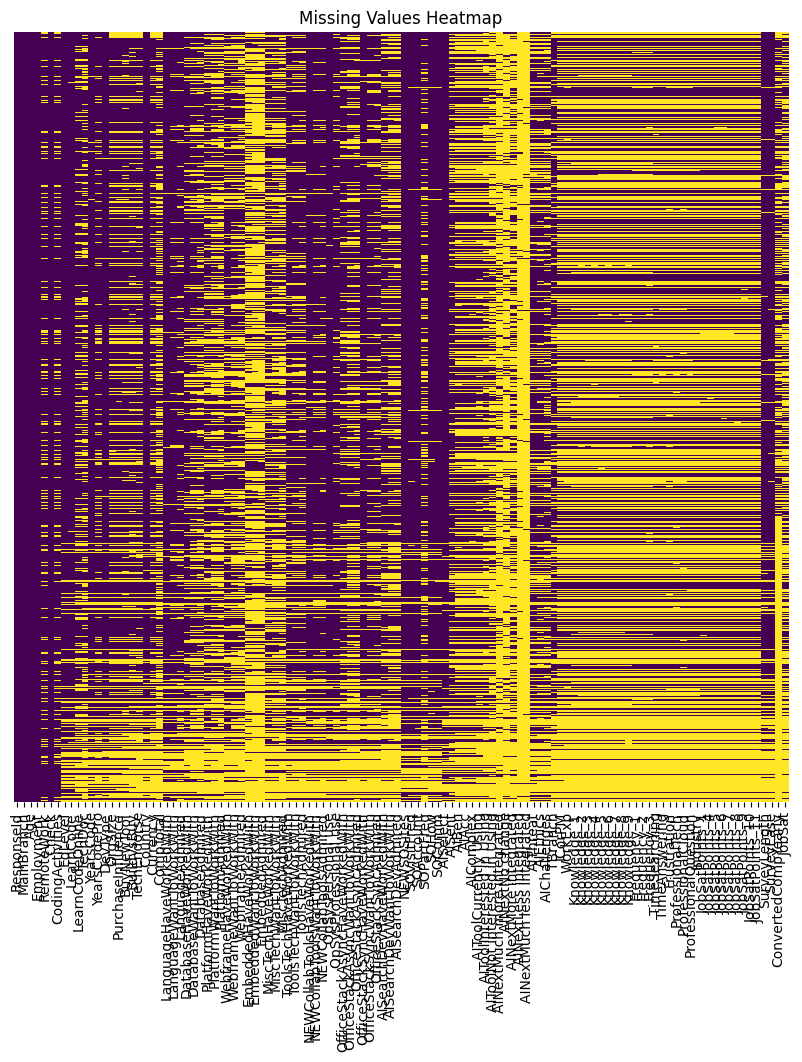

In [7]:
## Write your code here

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False, xticklabels=df.columns)

# Display the heatmap
plt.title("Missing Values Heatmap")
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [9]:
## Write your code here

# Count the number of missing rows for the 'RemoteWork' column
missing_remotework = df['RemoteWork'].isnull().sum()

# Display the number of missing values
print(f"Number of missing values in 'ERemoteWork' column: {missing_remotework}")

Number of missing values in 'ERemoteWork' column: 10637


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [10]:
## Write your code here

# Identify the most frequent value in the 'RemoteWork' column
most_frequent_remotework = df['RemoteWork'].mode()[0]  # mode() returns a Series, take the first value

# Display the most frequent value
print(f"The most frequent value in 'RemoteWork' column is: {most_frequent_remotework}")

The most frequent value in 'RemoteWork' column is: Hybrid (some remote, some in-person)


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [11]:
## Write your code here

# Impute missing values with the most frequent value
df['RemoteWork'].fillna(most_frequent_remotework, inplace=True)

# Display the DataFrame after imputing missing values
print("DataFrame after imputing missing values:")
print(df)

DataFrame after imputing missing values:
       ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
3               4                              I am learning to code   
4               5                     I am a developer by profession   
...           ...                                                ...   
65452       35588  I am not primarily a developer, but I write co...   
65453       50580                     I am a developer by profession   
65454        9938                     I am a developer by profession   
65455       40874                     I am a developer by profession   
65456       36796                     I am a developer by profession   

                      Age                                         Employment  \
0      Under 1

/tmp/ipykernel_979/3314834968.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(most_frequent_remotework, inplace=True)


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


/tmp/ipykernel_979/2572634272.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df, palette='viridis')


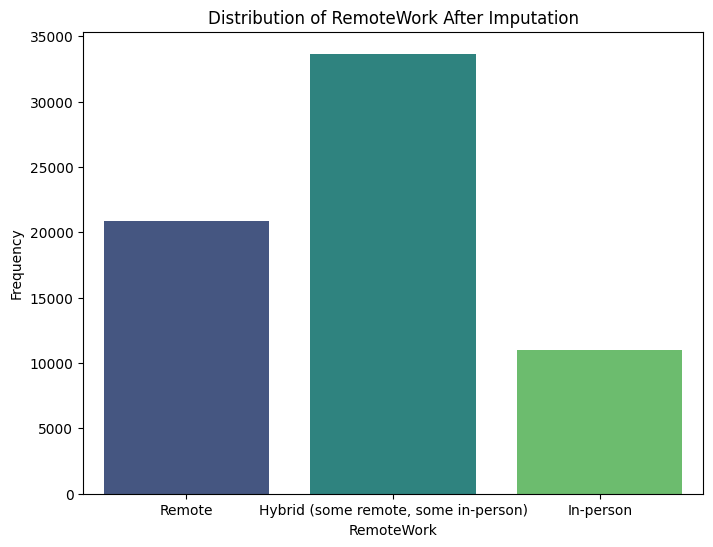

In [12]:
## Write your code here

# Create a bar plot to visualize the distribution of 'RemoteWork' after imputation
plt.figure(figsize=(8, 6))
sns.countplot(x='RemoteWork', data=df, palette='viridis')

# Display the plot
plt.title('Distribution of RemoteWork After Imputation')
plt.xlabel('RemoteWork')
plt.ylabel('Frequency')
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
